In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

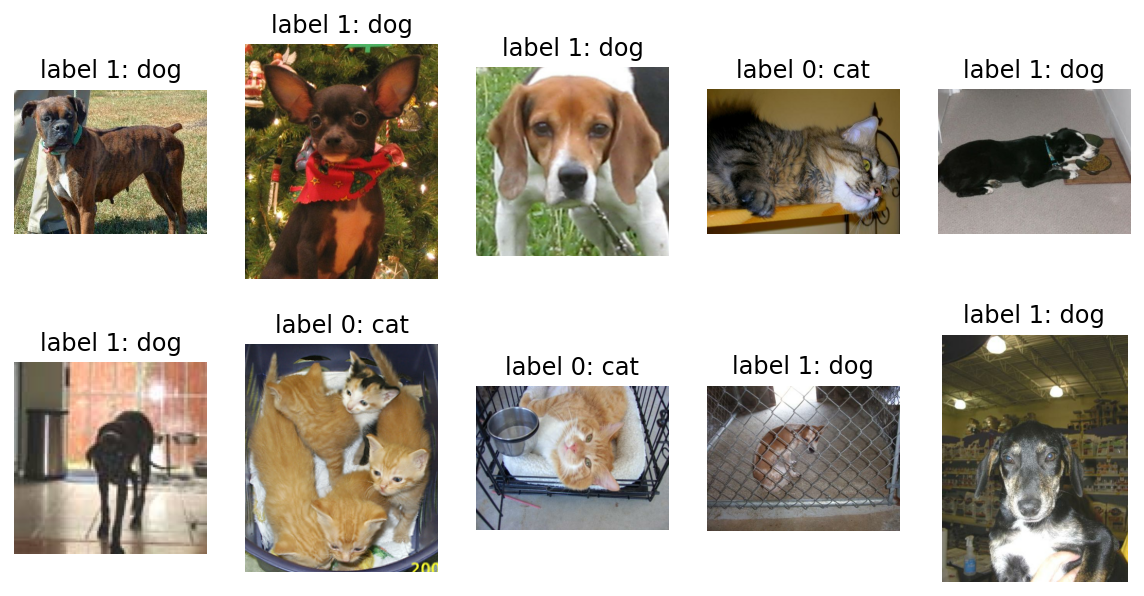

In [4]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [5]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [6]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

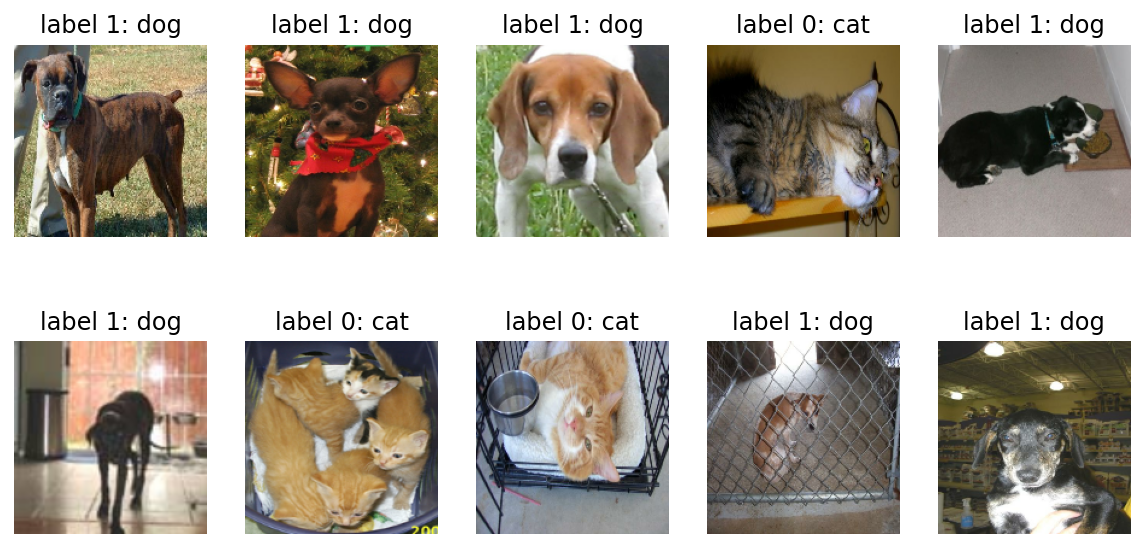

In [7]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [9]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [11]:
import numpy as np

image = np.array([[1, 2], [3, 4]])
print(image.shape)
image

(2, 2)


array([[1, 2],
       [3, 4]])

In [12]:
image.flatten()

array([1, 2, 3, 4])

In [13]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [15]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [16]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

print(train_batches)

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int64)>


In [17]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.4f}".format(loss0))
print("initial accuracy: {:.4f}".format(accuracy0))

20/20 [==============================] - 1s 26ms/step - loss: 0.7003 - accuracy: 0.5281
initial loss: 0.7003
initial accuracy: 0.5281


In [18]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
221/582 [==========>...................] - ETA: 37s - loss: 0.6486 - accuracy: 0.6234

KeyboardInterrupt: 

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(4, 4))
plt.subplot(1, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [21]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[9.9999928e-01, 7.3847485e-07],
       [9.9839008e-01, 1.6099894e-03],
       [5.9971530e-02, 9.4002843e-01],
       [9.9999928e-01, 7.2541150e-07],
       [9.2668700e-01, 7.3313005e-02],
       [7.3502547e-01, 2.6497456e-01],
       [8.1649739e-03, 9.9183500e-01],
       [9.9599624e-01, 4.0037464e-03],
       [1.8585414e-01, 8.1414586e-01],
       [5.4454160e-01, 4.5545837e-01],
       [2.2821992e-03, 9.9771786e-01],
       [9.9383128e-01, 6.1687431e-03],
       [9.9713922e-01, 2.8608593e-03],
       [3.4223292e-05, 9.9996579e-01],
       [9.9873656e-01, 1.2633938e-03],
       [9.9997413e-01, 2.5852756e-05],
       [6.6333467e-01, 3.3666533e-01],
       [2.5655099e-05, 9.9997437e-01],
       [9.9982685e-01, 1.7314265e-04],
       [9.9953437e-01, 4.6562855e-04],
       [9.8537153e-01, 1.4628476e-02],
       [3.0620706e-01, 6.9379294e-01],
       [9.9998629e-01, 1.3652263e-05],
       [9.2074221e-01, 7.9257809e-02],
       [9.9997902e-01, 2.0982916e-05],
       [2.3284212e-01, 7.

In [20]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

NameError: name 'predictions' is not defined

In [21]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

NameError: name 'images' is not defined

<Figure size 1440x864 with 0 Axes>

In [22]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    image = (image + 1) / 2
    correct = (label == prediction)
    if correct:
        count = count + 1

print(count / 32 * 100, '%')

NameError: name 'images' is not defined

In [23]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [24]:
image_batch.shape

TensorShape([32, 160, 160, 3])

In [25]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([32, 5, 5, 512])

In [26]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [27]:
feature_batch.shape

TensorShape([32, 5, 5, 512])

In [28]:
import numpy as np

image = np.array([[1, 2],
                  [3, 4]])

flattened_image = image.flatten()

print("Original image:\n", image)
print("Original image shape:", image.shape)
print()
print("Flattened image:\n", flattened_image)
print("Flattened image shape:", flattened_image.shape)

Original image:
 [[1 2]
 [3 4]]
Original image shape: (2, 2)

Flattened image:
 [1 2 3 4]
Flattened image shape: (4,)


In [29]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [30]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [31]:
dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 2)


In [32]:
base_model.trainable = False

In [33]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [36]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 6s 284ms/step - loss: 0.6493 - accuracy: 0.6047
initial loss: 0.65
initial accuracy: 0.60


In [37]:
EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
147/582 [======>.......................] - ETA: 2:28 - loss: 0.3866 - accuracy: 0.8756

KeyboardInterrupt: 

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'history' is not defined

In [39]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[0.9864992 , 0.01350084],
       [0.61236286, 0.3876372 ],
       [0.4927446 , 0.50725543],
       [0.9904413 , 0.00955875],
       [0.95211864, 0.04788135],
       [0.9584401 , 0.04155989],
       [0.1357552 , 0.8642448 ],
       [0.55693233, 0.4430677 ],
       [0.60367644, 0.39632356],
       [0.6207066 , 0.37929338],
       [0.04651586, 0.95348406],
       [0.9813835 , 0.01861647],
       [0.87824064, 0.12175934],
       [0.06349008, 0.93650997],
       [0.9619136 , 0.03808646],
       [0.90180236, 0.09819767],
       [0.7614311 , 0.2385689 ],
       [0.12868412, 0.8713159 ],
       [0.64360625, 0.35639372],
       [0.93991596, 0.06008407],
       [0.84173846, 0.15826151],
       [0.7590185 , 0.24098149],
       [0.88835806, 0.11164189],
       [0.83792686, 0.16207315],
       [0.93134266, 0.06865732],
       [0.8675229 , 0.13247712],
       [0.9320013 , 0.06799868],
       [0.40566775, 0.5943322 ],
       [0.919313  , 0.08068698],
       [0.33661956, 0.6633805 ],
       [0.

In [40]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

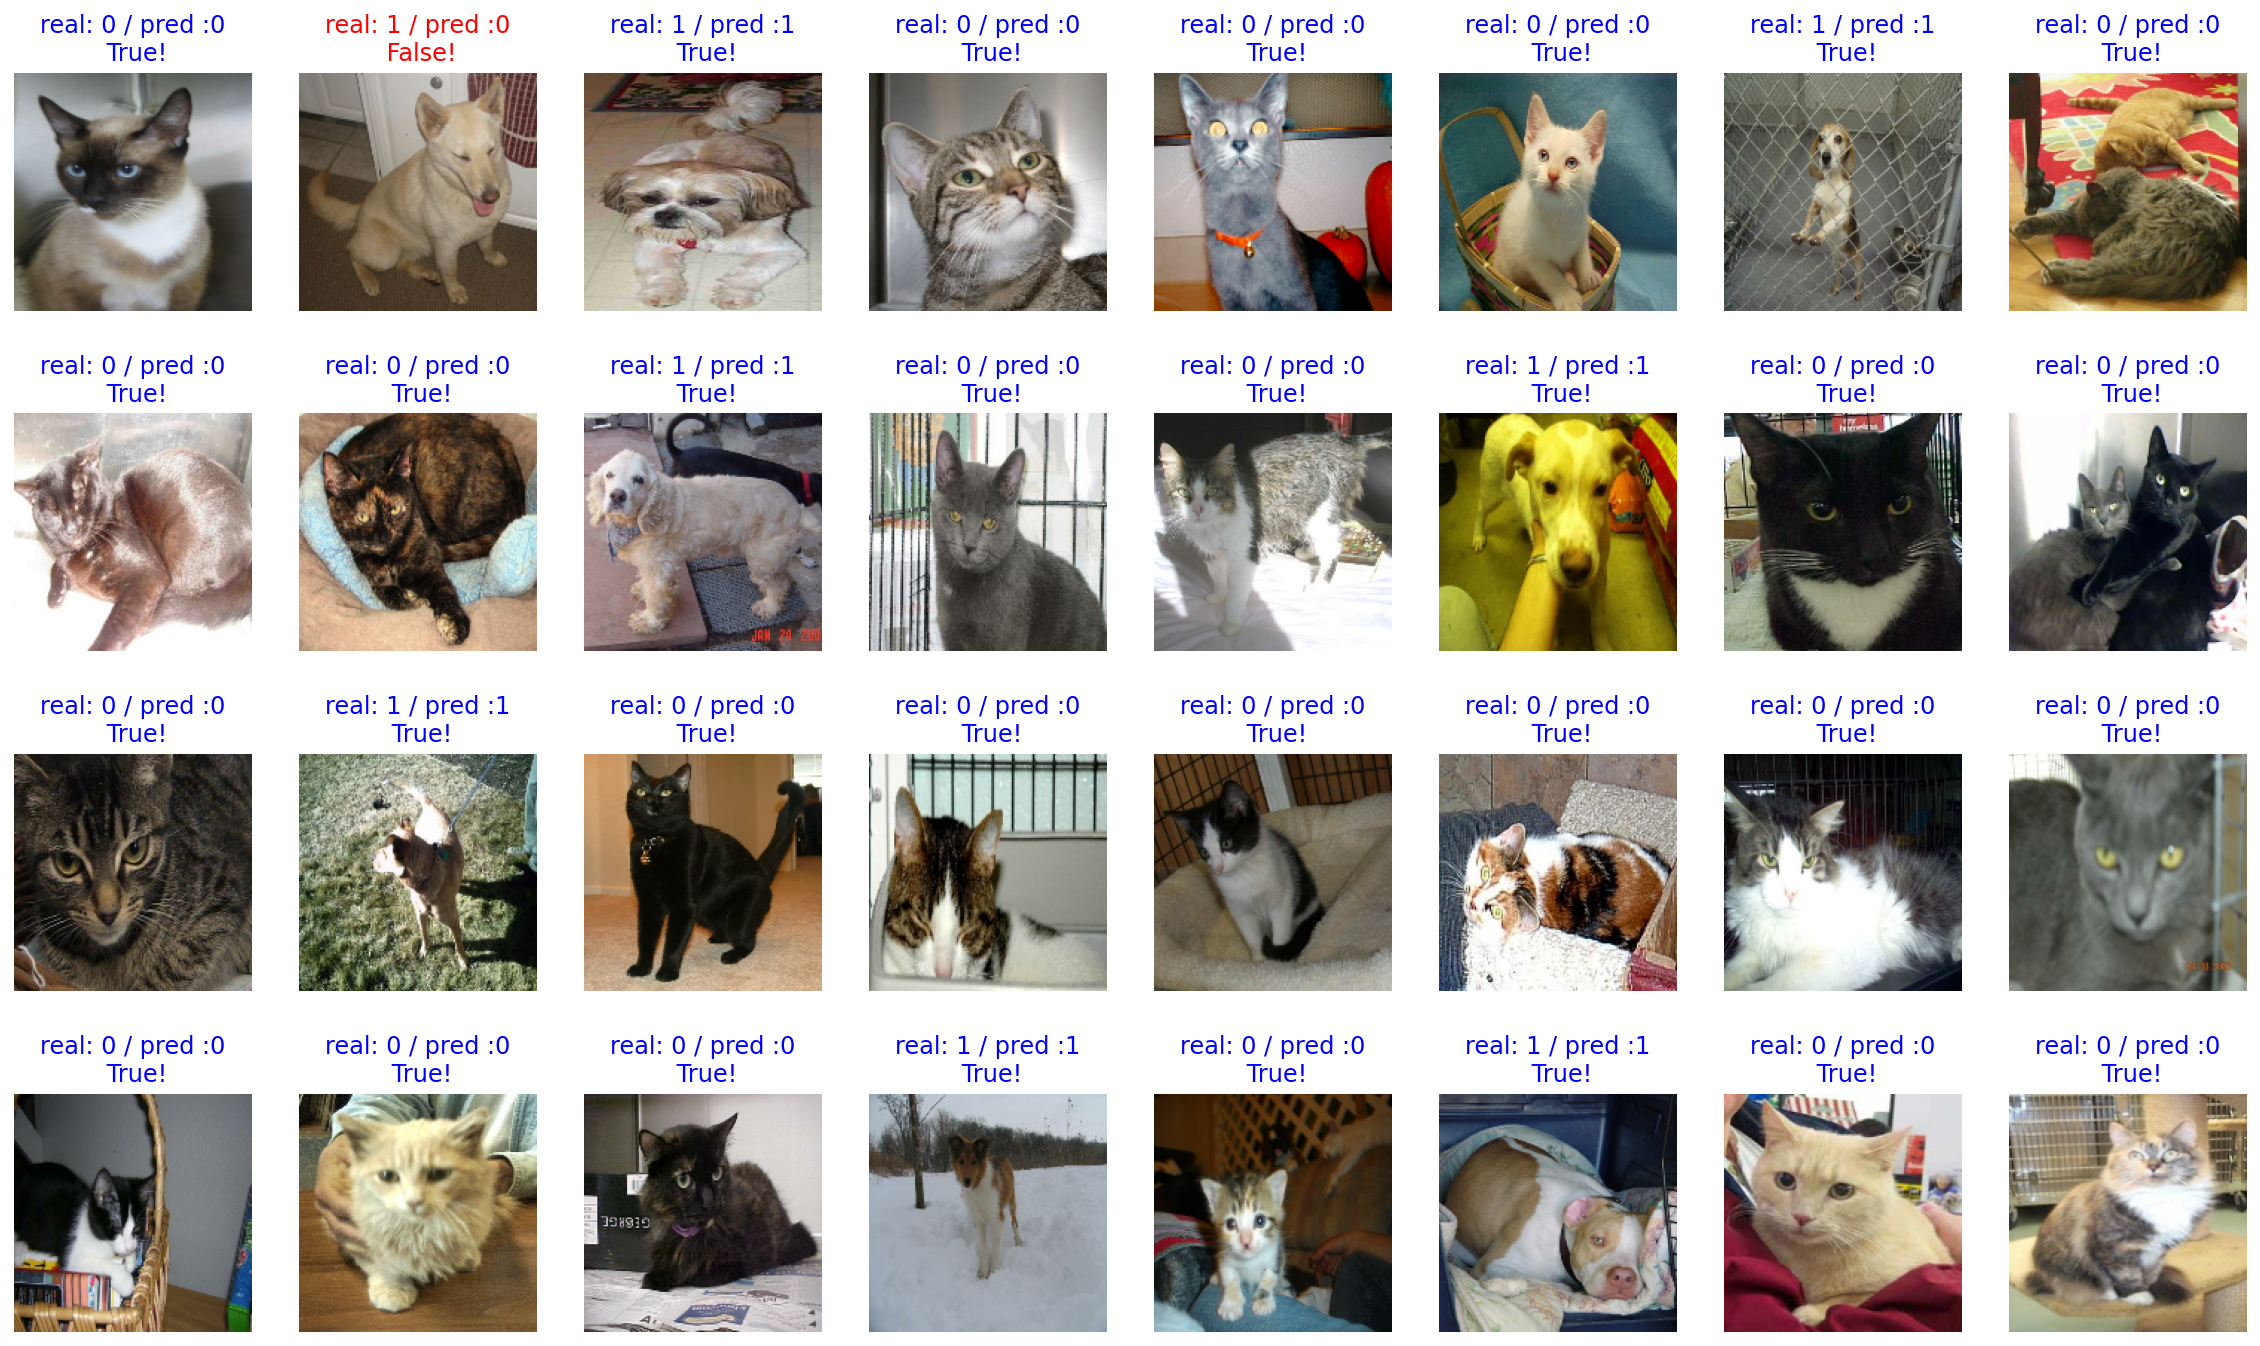

In [41]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [42]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100) # 약 95% 내외

96.875


# 폴더생성

## $ mkdir -p ~/aiffel/cat_vs_dog

## mkdir -p ~/aiffel/cat_vs_dog/checkpoint
## $ mkdir -p ~/aiffel/cat_vs_dog/images

In [43]:
import os

checkpoint_dir = os.getenv("HOME") + "/aiffel/cat_vs_dog/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

checkpoint 파일 생성 OK!!


In [44]:
img_dir_path = os.getenv("HOME") + "/aiffel/cat_vs_dog/images"
os.path.exists(img_dir_path)

True

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

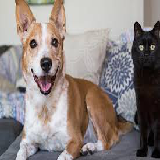

In [46]:
IMG_SIZE = 160
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpeg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image

In [47]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape

(1, 160, 160, 3)

In [50]:
prediction = model.predict(dog_image)
prediction

array([[0., 1.]], dtype=float32)

In [51]:
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
    cat_percentage = round(prediction[0] * 100)
    dog_percentage = round(prediction[1] * 100)
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")

This image seems 100.0% dog, and 0.0% cat.


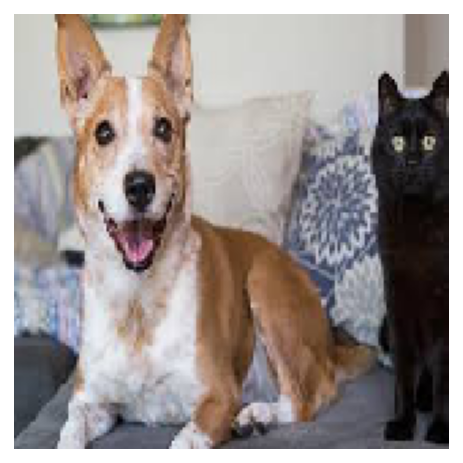

In [52]:
filename = 'my_dog.jpeg'

show_and_predict_image(img_dir_path, filename)

This image seems 0.0% dog, and 100.0% cat.


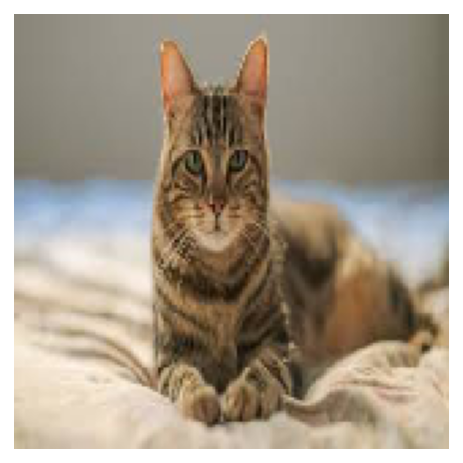

In [53]:
filename = 'my_cat.jpeg'

show_and_predict_image(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.


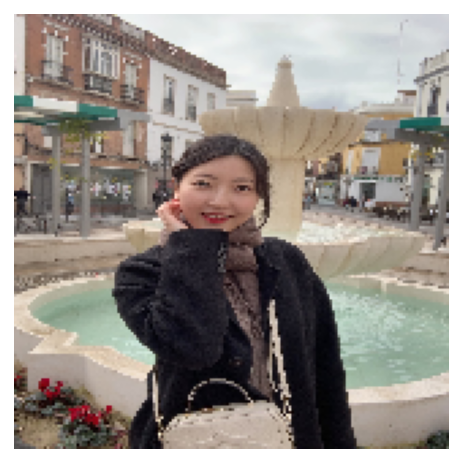

In [54]:
filename = "dayoon_face.jpg"
show_and_predict_image(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.


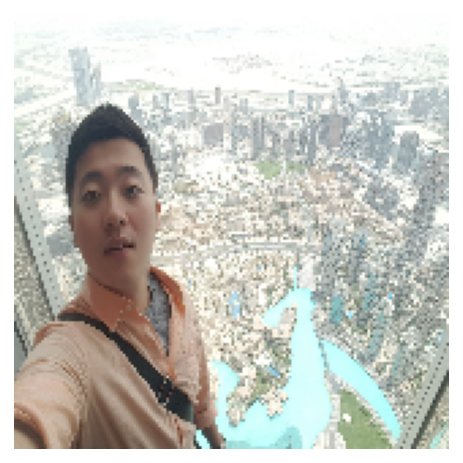

In [55]:
filename = "jungho_face.jpg"
show_and_predict_image(img_dir_path, filename)

In [ ]:
4-14. 프로젝트: 새로운 데이터셋으로 나만의 이미지 분류기 만들어보기
자, 이제 여러분의 차례입니다.
지금까지 진행했던 모든 과정을 통째로 활용해서, 새로운 데이터셋에 대해 여러분의 직접 모델을 만들어 볼 것입니다.

다음에 제안된 순서는 모두 위에서 진행했던 과정의 일부입니다. 몇 가지 코드만 수정하면 성공적으로 프로젝트를 진행할 수 있을 것입니다.
진행하다가 혹시 도움이 필요하다면 위에서 진행했던 실습 코드를 다시 참고하세요! 모든 해답은 그 안에 있습니다.

그러면, 시작해볼까요!

Step 1. 데이터셋 내려받기
이번에는 tensorflow_datasets 에 포함된 tf_flowers 데이터를 사용해 보겠습니다. tf_flowers 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.
tfds.load를 활용하여 데이터셋을 다운받으세요.
https://www.tensorflow.org/datasets/catalog/tf_flowers

Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기
이미지를 모두 같은 크기로 formatting 한 후, train_batches, validation_batches, test_batches를 준비합니다.

Step 3. 모델 설계하기
모델은 어떤 방식으로 설계하고 싶은가요? 나만의 모델을 만들 것인가요, 아니면 base_model을 활용할 것인가요?
원하는 방식으로 모델을 만들어 보세요!
cats_vs_dogs 의 경우와 달리, tf_flowers 데이터셋에서는 class의 갯수가 5가지입니다. 모델 설계시 어느 부분이 달라질지에 유의해 주세요.

Step 4. 모델 학습시키기
모델을 학습시켜봅니다. 단, 여기에서는 여러 가지 옵션을 바꿔볼 수 있습니다.
예를 들어, 모델 학습을 10 epoch보다 더 많이 시켜보거나, learning_rate 값을 바꿔볼 수 있습니다.
또는, optimizer의 종류도 바꿔볼 수 있습니다. 바꿔보고 싶다면, 여기를 참고하세요.
어쩌면 VGG16이 아닌 다른 모델을 base model로 활용할 수도 있을 것입니다. 그리고 파인튜닝을 fc layer의 구성에 변화를 줄 수 있을지도 모릅니다.
이전 스텝에서는 시도하지 않았던 Regularization 기법이 적용된다면 어떨까요? Dropout이나 Batch Normalization을 적용하는 것은 그리 어려운 일이 아닙니다.

Step 5. 모델 성능 평가하기
모델 학습이 완료되었다면, 모델의 성능을 평가할 차례입니다.
모델이 학습된 과정을 그래프로도 그려보고, validation_batches나 test_batches에 있는 데이터에 대한 예측 결과도 확인해 보세요!

Step 6. 모델 활용하기
모델이 꽤나 똑똑해졌다면, 이제 활용해볼 수 있습니다.
원하는 이미지를 자유롭게 모델에 입력해 보고, 어떤 예측 결과를 내는지 확인해 보세요!